## ViT Mobile Crane Trained model testing

Inference Time: 0.1194 seconds
RSS (Memory Usage): 1.10 MB
VMS (Memory Usage): -0.12 MB
Predicted Class: a23_Unclear division of work area
Consequences Score: 40.00
Consequences Level: Mild Consequences (Unsafe Classification)
Image saved to: results/mobile_vit\sr_a23_Unclear division of work area_test_image_m_crane.png


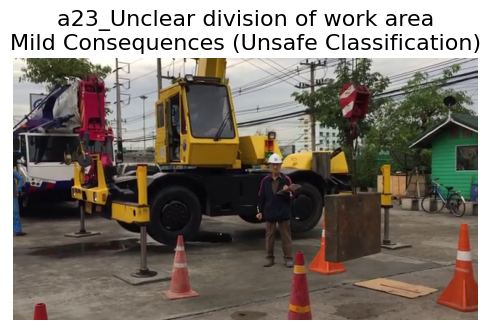

In [4]:
import torch
import torchvision
import numpy as np
from PIL import Image
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import psutil
import time

# Define class names and corresponding Consequence Scores in the same order
class_names = [
        'a41_Collapse',
         'a42_Tipping over',
         'a43_Fall of crane jib, boom, other parts',
         'a44_Fall of loads',
         'a45_Collision',
         'a46_Struck-by',
         'a47_Struck-by objects',
         'a31_Potential colision',
         'a32_Potential struck-by',
         'a33_Load tipping or shifting',
         'a11_Outriggers',
         'a12_Movement',
         'a13_Lifting operation',
         'a14_Safe access to the deck',
         'a21_Operating on unsafe terrian',
         'a22_Unstable lifting operation',
         'a23_Unclear division of work area',
         'a24_Unsafe access to a working crane',
         'a25_Operating near power lines'
    ]

consequence_scores = [
    80, 80, 80, 80, 80, 80, 80, 60, 60, 60, 20, 20, 20, 20, 
    40, 40, 40, 40, 40
]

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torchvision.models.vit_b_16(weights=torchvision.models.ViT_B_16_Weights.DEFAULT)

# Freeze parameters
for param in model.parameters():
    param.requires_grad = False

# Custom head for ViT model
class CustomHead(nn.Module):
    def __init__(self, in_features, num_classes):
        super(CustomHead, self).__init__()
        self.fc1 = nn.Linear(in_features, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x

# Modify model head
num_features = model.heads[0].in_features
num_classes = len(class_names)
model.heads[0] = CustomHead(num_features, num_classes)
model.load_state_dict(torch.load('./vit_mobile_crane_activity_model_epoch10.pth'))
model = model.to(device)
model.eval()

# Preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image).unsqueeze(0)
    return image

# Function to predict image class and map to consequences
def predict_consequence(image_path):
    image = preprocess_image(image_path).to(device)
    
    # Memory and inference time monitoring
    process = psutil.Process(os.getpid())
    rss_before = process.memory_info().rss / (1024 * 1024)
    vms_before = process.memory_info().vms / (1024 * 1024)
    start_time = time.time()
    
    with torch.no_grad():
        output = model(image)
        probabilities = torch.softmax(output, dim=1).cpu().numpy().flatten()
    
    end_time = time.time()
    rss_after = process.memory_info().rss / (1024 * 1024)
    vms_after = process.memory_info().vms / (1024 * 1024)
    inference_time = end_time - start_time
    
    print(f"Inference Time: {inference_time:.4f} seconds")
    print(f"RSS (Memory Usage): {rss_after - rss_before:.2f} MB")
    print(f"VMS (Memory Usage): {vms_after - vms_before:.2f} MB")
    
    # Calculate Consequence Score using the consequence_scores list in the correct order
    consequence_score = sum(prob * consequence_scores[i] for i, prob in enumerate(probabilities))
    # Assign the two-decimal rounded value directly to consequence_score
    consequence_score = float(f"{consequence_score:.2f}")
    
    # Determine Consequence Level based on the score
    if consequence_score <= 20:
        consequence_level = "Negligible Consequences (Safety Classification)"
    elif 20 < consequence_score <= 40:
        consequence_level = "Mild Consequences (Unsafe Classification)"
    elif 40 < consequence_score <= 60:
        consequence_level = "Moderate Consequences (Near Miss Incident)"
    else:
        consequence_level = "Severe Consequences (Incident)"
    
    # Display Results
    predicted_class = class_names[output.argmax().item()]
    print(f"Predicted Class: {predicted_class}")
    print(f"Consequences Score: {consequence_score:.2f}")
    print(f"Consequences Level: {consequence_level}")
    return predicted_class, consequence_level

def display_image_with_label(image_path, class_label, consequence_level, save_fig=False):
    image = Image.open(image_path).convert('RGB')
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"{class_label}\n{consequence_level}", fontsize=16, color='black')
    plt.axis('off')
    
    if save_fig:
        save_dir = 'results/mobile_vit'
        os.makedirs(save_dir, exist_ok=True)
        base_name = os.path.basename(image_path)
        save_path = os.path.join(save_dir, f'sr_{base_name}')
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
        print(f"Image saved to: {save_path}")
    
    plt.show()

# Define image path
folder = "model_testing_image"
image_name = "a23_Unclear division of work area_test_image_m_crane.png"
img_path = os.path.join(folder, image_name)

# Run inference and display results
predicted_class, consequence_level = predict_consequence(img_path)
display_image_with_label(img_path, predicted_class, consequence_level, save_fig=True)


## ViT Tower Crane Trained model testing

Inference Time: 0.1035 seconds
RSS (Memory Usage): 1.43 MB
VMS (Memory Usage): 0.00 MB
Predicted Class: b23_Unclear division of work area
Consequences Score: 40.00
Consequences Level: Moderate Consequences (Near Miss Incident)
Image saved to: results/tower_vit\sr_b23_Unclear division of work area_test_image_t_crane.png


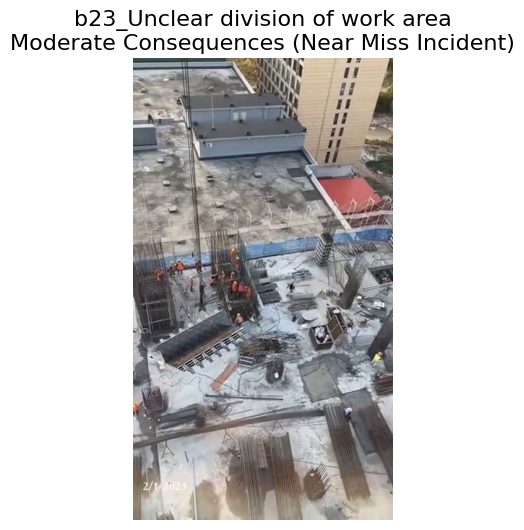

In [8]:
import torch
import torchvision
import numpy as np
from PIL import Image
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import psutil
import time

# Define class names and corresponding Consequence Scores in the same order
class_names = [
 'b41_Collapse',
 'b42_Tipping over',
 'b43_Fall of crane jib, boom, other parts',
 'b44_Fall of load',
 'b45_Collision',
 'b46_Struck-by',
 'b47-Struck by objects',
 'b31_Potential collision',
 'b32_Potential struck-by',
 'b33_ Load tipping or shifting',
 'b11_Assembling,dismantling',
 'b12_Erection',
 'b13_Lifting operation',
 'b14_Safe access to the deck',
 'b21_Inadequate use of PPE',
 'b22_Unstable lifting operation',
 'b23_Unclear division of work area',
 'b24_Unsafe access to a working crane',
 'b25_Operating near power lines'
       
]

consequence_scores = [
    80, 80, 80, 80, 80, 80, 80, 60, 60, 60, 20, 20, 20, 20, 
    40, 40, 40, 40, 40
]

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torchvision.models.vit_b_16(weights=torchvision.models.ViT_B_16_Weights.DEFAULT)

# Freeze parameters
for param in model.parameters():
    param.requires_grad = False

# Custom head for ViT model
class CustomHead(nn.Module):
    def __init__(self, in_features, num_classes):
        super(CustomHead, self).__init__()
        self.fc1 = nn.Linear(in_features, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x

# Modify model head
num_features = model.heads[0].in_features
num_classes = len(class_names)
model.heads[0] = CustomHead(num_features, num_classes)
model.load_state_dict(torch.load('./vit_tower_crane_activity_model_epoch10.pth'))
model = model.to(device)
model.eval()

# Preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image).unsqueeze(0)
    return image

# Function to predict image class and map to consequences
def predict_consequence(image_path):
    image = preprocess_image(image_path).to(device)
    
    # Memory and inference time monitoring
    process = psutil.Process(os.getpid())
    rss_before = process.memory_info().rss / (1024 * 1024)
    vms_before = process.memory_info().vms / (1024 * 1024)
    start_time = time.time()
    
    with torch.no_grad():
        output = model(image)
        probabilities = torch.softmax(output, dim=1).cpu().numpy().flatten()
    
    end_time = time.time()
    rss_after = process.memory_info().rss / (1024 * 1024)
    vms_after = process.memory_info().vms / (1024 * 1024)
    inference_time = end_time - start_time
    
    print(f"Inference Time: {inference_time:.4f} seconds")
    print(f"RSS (Memory Usage): {rss_after - rss_before:.2f} MB")
    print(f"VMS (Memory Usage): {vms_after - vms_before:.2f} MB")
    
    # Calculate Consequence Score using the consequence_scores list in the correct order
    consequence_score = sum(prob * consequence_scores[i] for i, prob in enumerate(probabilities))
    # Assign the two-decimal rounded value directly to consequence_score
    consequence_score = float(f"{consequence_score:.2f}")
    
    # Determine Consequence Level based on the score
    if consequence_score <= 20:
        consequence_level = "Negligible Consequences (Safety Classification)"
    elif 20 < consequence_score <= 40:
        consequence_level = "Mild Consequences (Unsafe Classification)"
    elif 40 < consequence_score <= 60:
        consequence_level = "Moderate Consequences (Near Miss Incident)"
    else:
        consequence_level = "Severe Consequences (Incident)"
    
    # Display Results
    predicted_class = class_names[output.argmax().item()]
    print(f"Predicted Class: {predicted_class}")
    print(f"Consequences Score: {consequence_score:.2f}")
    print(f"Consequences Level: {consequence_level}")
    return predicted_class, consequence_level

def display_image_with_label(image_path, class_label, consequence_level, save_fig=False):
    image = Image.open(image_path).convert('RGB')
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"{class_label}\n{consequence_level}", fontsize=16, color='black')
    plt.axis('off')
    
    if save_fig:
        save_dir = 'results/tower_vit'
        os.makedirs(save_dir, exist_ok=True)
        base_name = os.path.basename(image_path)
        save_path = os.path.join(save_dir, f'sr_{base_name}')
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
        print(f"Image saved to: {save_path}")
    
    plt.show()

# Define image path
folder = "model_testing_image"
image_name = "b23_Unclear division of work area_test_image_t_crane.png"
img_path = os.path.join(folder, image_name)

# Run inference and display results
predicted_class, consequence_level = predict_consequence(img_path)
display_image_with_label(img_path, predicted_class, consequence_level, save_fig=True)
